In [3]:
%load_ext autoreload
%autoreload 2

import torch
from torchinfo import summary

from src.encoders import conv_10_3_10, conv_identity
from src.utils import DeviceManager
from src.decoders import TurboAEDecoder
from src.interleavers import FixedPermuteInterleaver

manager = DeviceManager(no_cuda=True, seed=1234)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


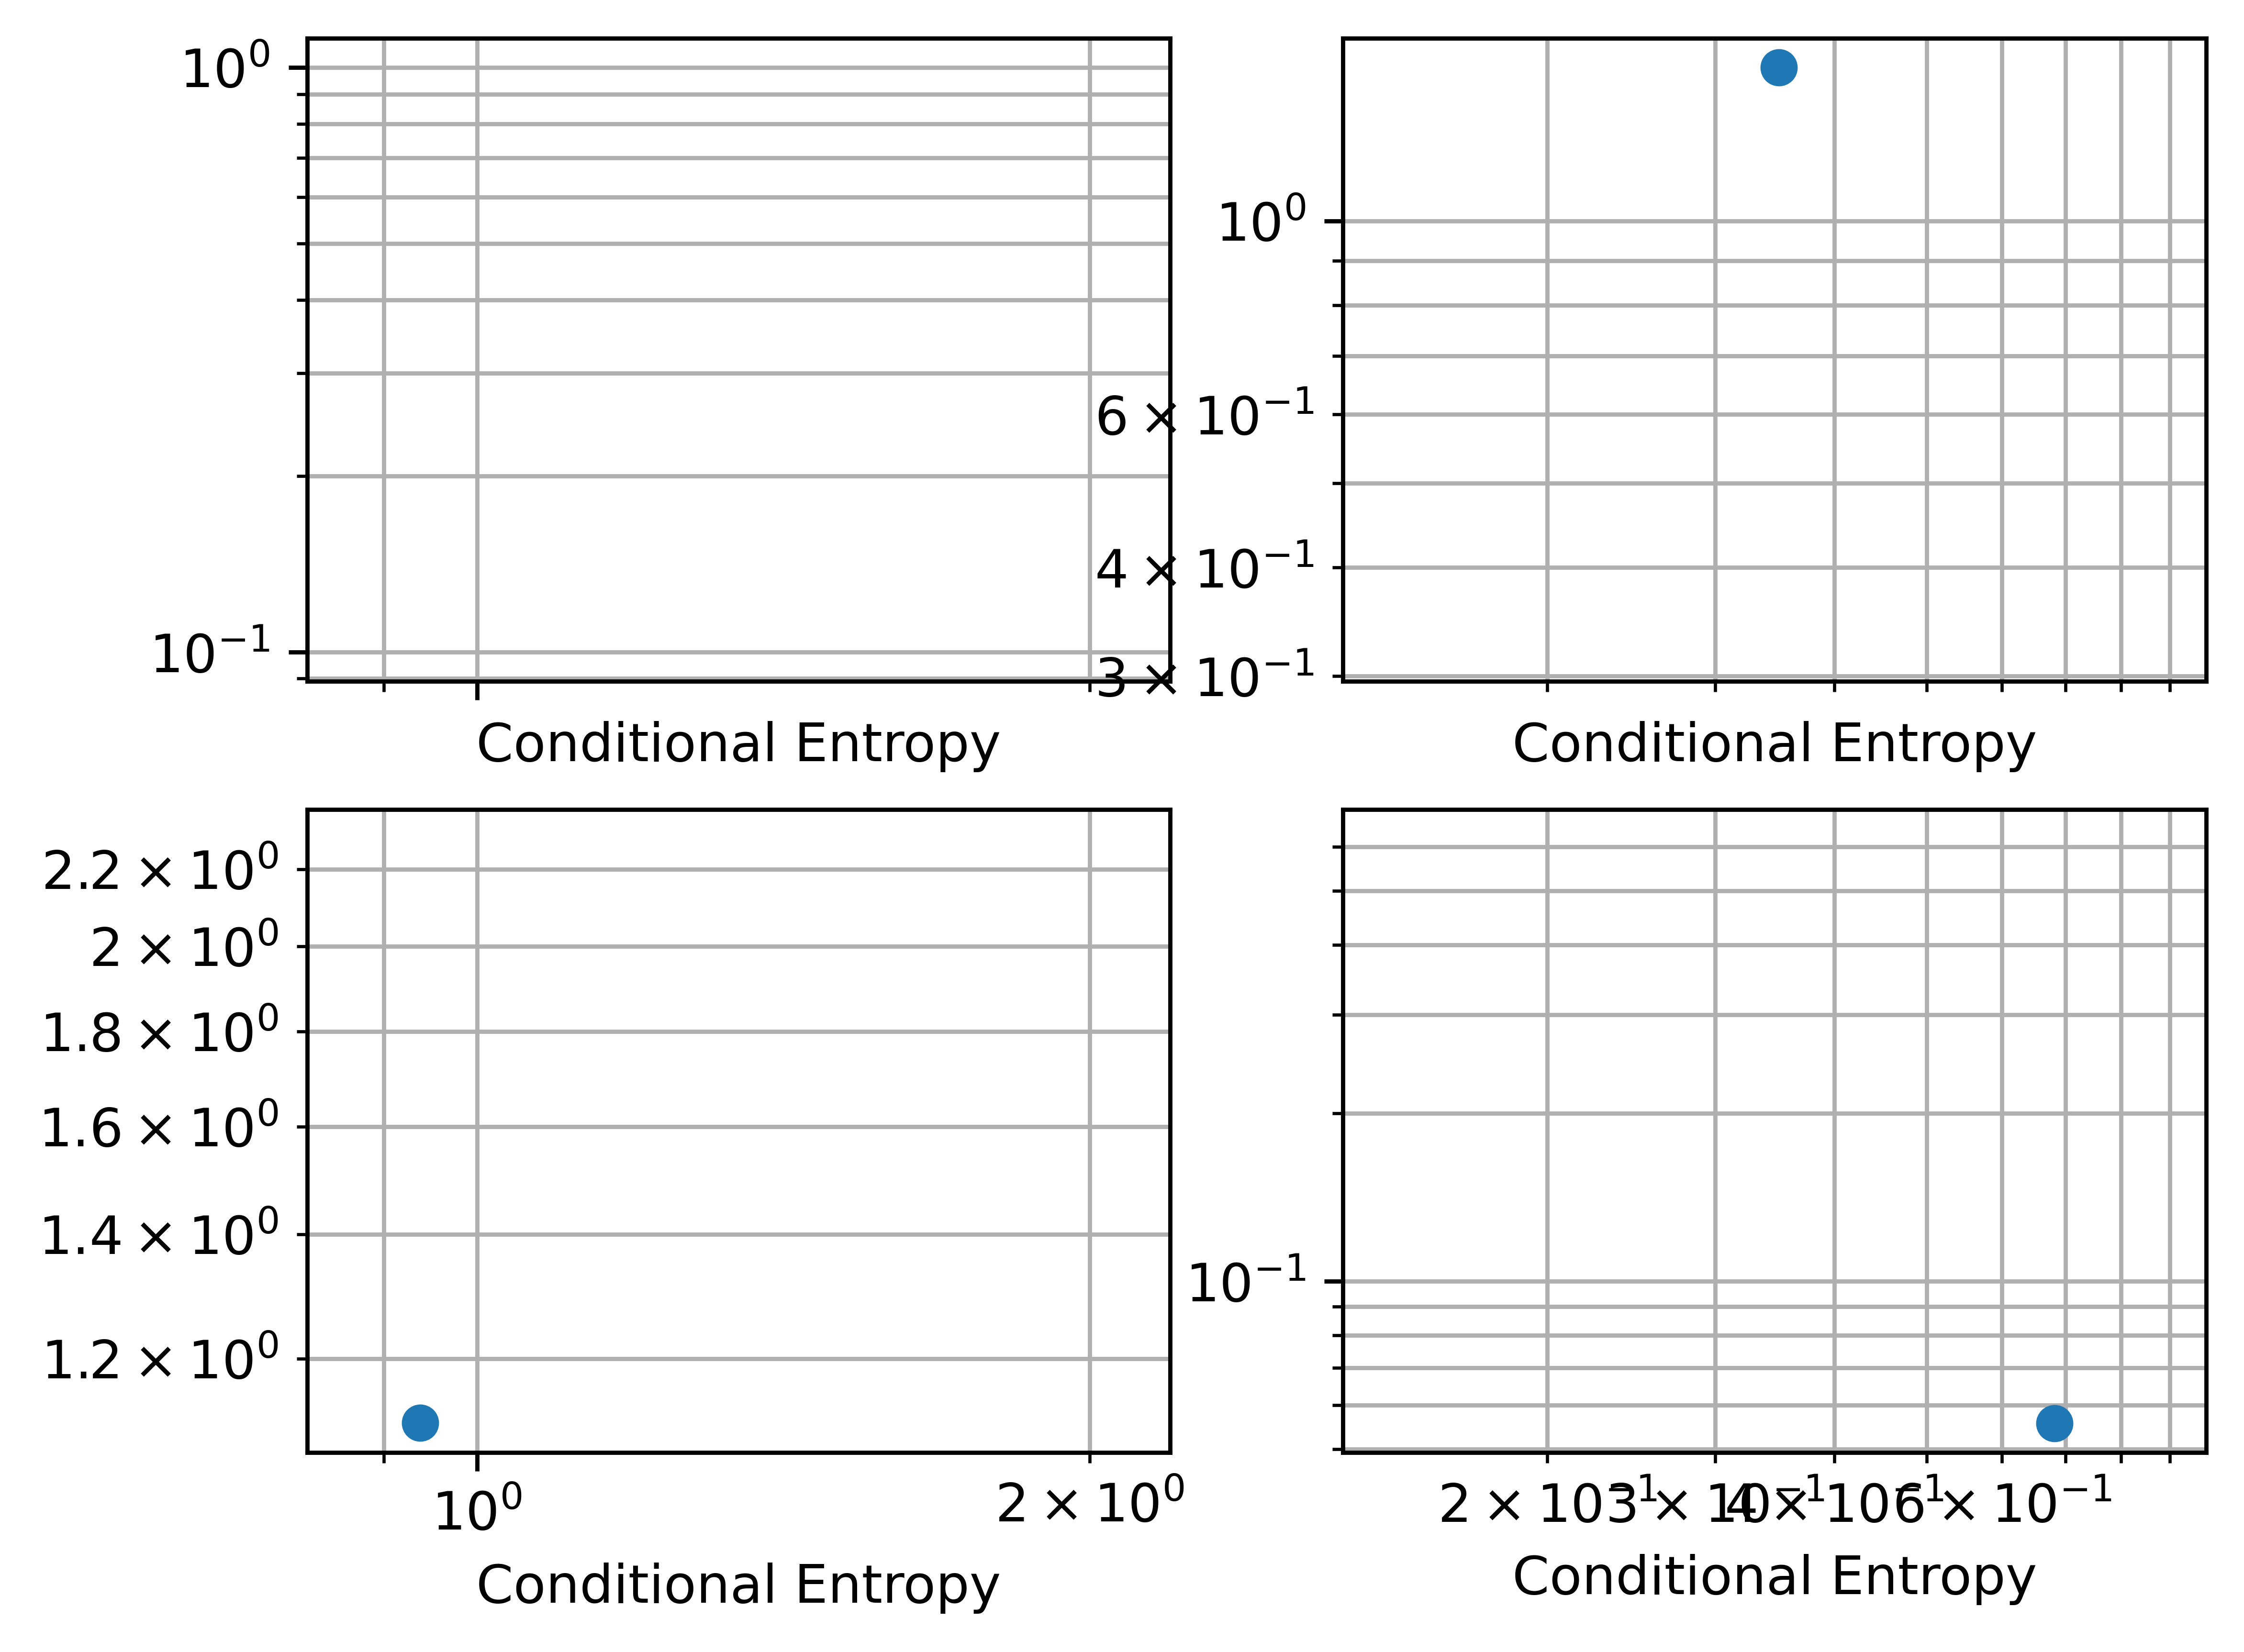

In [3]:
import matplotlib.pyplot as plt
import numpy as np

nrows = 2
ncols = 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex="col", dpi=800)

def test_plot(ax):
    ax.minorticks_on()
    ax.grid(visible=True, which="both")
    ax.set_axisbelow(True)
    
    # cmap_helper = MplColorHelper("plasma", start_val=df["epoch"].min(), stop_val=df["epoch"].max())
    # c = np.array(cmap_helper.get_rgb(df["epoch"]))
    # display(df.reset_index().loc[:20, ["epoch", "kl__mean", "true_xe__mean"]])
    
    # kl = df["kl__mean"]
    # cond_ent = df["true_xe__mean"]
    # # Non-negative values
    # filter = df["kl__mean"] > 0
    # ax.scatter(
    #     cond_ent[filter], 
    #     kl[filter], 
    #     c=c[filter.values]
    # )
    # ax.scatter(
    #     cond_ent[~filter], 
    #     np.full_like(cond_ent[~filter].values, fill_value=kl[filter].min()), 
    #     c=c[~filter.values],
    #     marker="x"
    # )
    
    ax.scatter(x=np.random.randn(5), y=np.random.randn(5))
    
    
    # ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Conditional Entropy')
    
    return ax

for i in range(nrows):
    for j in range(ncols):
        test_plot(axs[i, j])

In [5]:
front_pad: bool = False
first_pad: bool = False
num_iteration: int = 6
num_iter_ft: int = 5
dec_num_layer: int = 5
dec_num_unit: int = 100
dec_kernel_size: int = 5

interleaver = FixedPermuteInterleaver(40)

decoder = TurboAEDecoder(
        num_iteration=num_iteration,
        num_iter_ft=num_iter_ft,
        dec_num_layer=dec_num_layer,
        dec_num_unit=dec_num_unit,
        dec_kernel_size=dec_kernel_size,
        front_pad=front_pad,
        interleaver=interleaver,
        device_manager=manager,
    )
summary(decoder)

Layer (type:depth-idx)                        Param #
TurboAEDecoder                                --
├─FixedPermuteInterleaver: 1-1                --
├─ModuleList: 1-2                             --
│    └─SameShapeConv1d: 2-1                   --
│    │    └─ModuleList: 3-1                   204,000
│    │    └─ModuleList: 3-2                   --
│    └─SameShapeConv1d: 2-2                   --
│    │    └─ModuleList: 3-3                   204,000
│    │    └─ModuleList: 3-4                   --
│    └─SameShapeConv1d: 2-3                   --
│    │    └─ModuleList: 3-5                   204,000
│    │    └─ModuleList: 3-6                   --
│    └─SameShapeConv1d: 2-4                   --
│    │    └─ModuleList: 3-7                   204,000
│    │    └─ModuleList: 3-8                   --
│    └─SameShapeConv1d: 2-5                   --
│    │    └─ModuleList: 3-9                   204,000
│    │    └─ModuleList: 3-10                  --
│    └─SameShapeConv1d: 2-6            

In [3]:
decoder_fp = "../models/decoders/train_neural_decoder_block_len_100_2063b3623d250ba6d23173daac8c7f33964d2105.pt"

model_dict = torch.load(decoder_fp, map_location=torch.device('cpu'))
model_dict.keys()

odict_keys(['interleaver.permutation', 'interleaver.depermutation', 'dec1_cnns.0.cnns.0.weight', 'dec1_cnns.0.cnns.0.bias', 'dec1_cnns.0.cnns.1.weight', 'dec1_cnns.0.cnns.1.bias', 'dec1_cnns.0.cnns.2.weight', 'dec1_cnns.0.cnns.2.bias', 'dec1_cnns.0.cnns.3.weight', 'dec1_cnns.0.cnns.3.bias', 'dec1_cnns.0.cnns.4.weight', 'dec1_cnns.0.cnns.4.bias', 'dec1_cnns.1.cnns.0.weight', 'dec1_cnns.1.cnns.0.bias', 'dec1_cnns.1.cnns.1.weight', 'dec1_cnns.1.cnns.1.bias', 'dec1_cnns.1.cnns.2.weight', 'dec1_cnns.1.cnns.2.bias', 'dec1_cnns.1.cnns.3.weight', 'dec1_cnns.1.cnns.3.bias', 'dec1_cnns.1.cnns.4.weight', 'dec1_cnns.1.cnns.4.bias', 'dec1_cnns.2.cnns.0.weight', 'dec1_cnns.2.cnns.0.bias', 'dec1_cnns.2.cnns.1.weight', 'dec1_cnns.2.cnns.1.bias', 'dec1_cnns.2.cnns.2.weight', 'dec1_cnns.2.cnns.2.bias', 'dec1_cnns.2.cnns.3.weight', 'dec1_cnns.2.cnns.3.bias', 'dec1_cnns.2.cnns.4.weight', 'dec1_cnns.2.cnns.4.bias', 'dec1_cnns.3.cnns.0.weight', 'dec1_cnns.3.cnns.0.bias', 'dec1_cnns.3.cnns.1.weight', 'dec1_c

In [19]:
model_fp = "../tmp/models/train_turbo_fourier_block_len_10_3ff57a8464e08e197f3f814722c87f8989ae9641.pt"
fourier_fp = "../tmp/models/train_turbo_fourier_block_len_10_3ff57a8464e08e197f3f814722c87f8989ae9641.pt.fourier"

model_dict = torch.load(model_fp)
fourier_list = torch.load(fourier_fp)

print(model_dict.keys())
print(len(fourier_list))

odict_keys(['noninterleaved_encoder.fourier_coefficients', 'interleaved_encoder.fourier_coefficients', 'interleaver.permutation', 'interleaver.depermutation'])
11


In [20]:
print(all((fourier_list[0]['noninterleaved'] == fourier_list[i]['noninterleaved']).all() for i in range(len(fourier_list))))
print((model_dict['noninterleaved_encoder.fourier_coefficients'] == fourier_list[0]['noninterleaved']).all())

True
tensor(True)


In [3]:
s = torch.load(TURBOAE_DECODER_PATH)
ks = ['_num_iteration', '_num_iter_ft', '_dec_num_layer', '_dec_num_unit', '_dec_kernel_size']
print({k: s[k] for k in ks})

{'_num_iteration': tensor(6), '_num_iter_ft': tensor(5), '_dec_num_layer': tensor(5), '_dec_num_unit': tensor(100), '_dec_kernel_size': tensor(5)}


In [3]:
path = "../models/train_turbo_table_block_len_16_e5ab48f46450ac63d91b1e31a45c8b3181f98f72.pt"
s = torch.load(path)
s

OrderedDict([('noninterleaved_encoder.table',
              tensor([[-1.3508, -4.2147],
                      [ 2.1670,  4.8469],
                      [ 5.4583, -1.3839],
                      [-4.6528,  2.7871],
                      [-1.4692,  7.1911],
                      [ 2.7384, -5.3207],
                      [-4.6172, -2.1801],
                      [ 4.5543,  4.2089],
                      [ 5.3825, -3.5348],
                      [-1.9329,  4.0327],
                      [-3.9973,  1.6923],
                      [ 2.1903,  1.8216],
                      [ 2.3863, -0.5175],
                      [ 0.3424, -2.5819],
                      [ 5.6782,  5.0692],
                      [-4.9278, -0.8368],
                      [-3.6155, -3.7730],
                      [ 5.6937,  2.8372],
                      [ 2.6190,  6.0451],
                      [-2.4331, -4.9978],
                      [-7.0148,  1.8387],
                      [ 2.8097,  6.7214],
                      [-1.1324

In [5]:
torch.std_mean(s['noninterleaved_encoder.table'], dim=0)

(tensor([4.1186, 4.3143]), tensor([0.5075, 0.5022]))

In [25]:
batch_size = 1
block_len = 10

input_data = torch.randint(
    0,
    2,
    (batch_size, block_len),
    generator=manager.generator,
    device=manager.device,
    dtype=torch.int8,
)

In [26]:
c1 = conv_10_3_10(block_len, manager)
c2 = conv_identity(block_len, manager)

In [27]:
c1(input_data)

tensor([[[0., 0.],
         [1., 0.],
         [1., 0.],
         [0., 0.],
         [0., 0.],
         [1., 0.],
         [0., 0.],
         [1., 0.],
         [0., 0.],
         [0., 0.]]])

In [28]:
c2(input_data)

tensor([[[0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.]]])

In [29]:
input_data

tensor([[0, 1, 1, 0, 0, 1, 0, 1, 0, 0]], dtype=torch.int8)